In [132]:
#Importing necesary libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

#Getting info from the dataset
path = "/Users/miriamg/Documents/Mid-Term-Project_ML_Ironhack/Mid-term project/airbnb_DF.csv"
mx_airbnb = pd.read_csv(path)
mx_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.383990,-99.273350,Entire home/apt,4019,1,0,NaN,NaN,1,364
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.410060,-99.176450,Entire home/apt,8286,1,49,2020-10-25,0.44,10,364
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.437780,-99.155490,Entire home/apt,650,4,60,2019-07-24,1.59,2,0
3,58955,Entire beautiful duplex in la Roma,282620,Laura,NaN,Cuauhtémoc,19.422920,-99.157750,Entire home/apt,1447,15,42,2020-01-31,0.38,1,0
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.412590,-99.179590,Private room,1206,2,52,2019-11-03,1.36,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847,47216226,De Lux Apartment Loft Polanco 402,377262235,Rosa Ma.,NaN,Miguel Hidalgo,19.431680,-99.182640,Entire home/apt,1061,2,0,NaN,NaN,3,365
19848,47216443,Loft pequeño con cocineta a pasos de Reforma,87544364,Antonio,NaN,Cuauhtémoc,19.433830,-99.153780,Entire home/apt,426,1,0,NaN,NaN,9,365
19849,47218209,Loft Deluxe Departamento Polanco 408,377262235,Rosa Ma.,NaN,Miguel Hidalgo,19.431540,-99.183100,Entire home/apt,1059,1,0,NaN,NaN,3,365
19850,47219108,Stuning apartment in Santa Fe 4beds/3baths,377662942,Susan,NaN,Cuajimalpa de Morelos,19.360834,-99.269901,Entire home/apt,1760,2,0,NaN,NaN,1,365


In [133]:
mx_airbnb.columns #We define the most important columns for price as: 'neighbourhood', 'room_type', 'price',
       #'minimum_nights','number_of_reviews','calculated_host_listings_count'
    
unique_values = mx_airbnb.nunique()
print("Number of unique values in each column:")
print(unique_values) #calculated_host_listings count means the amount of ads that the host has on the platform, or professionalism


#for column in mx_airbnb.columns:
    #unique_values = mx_airbnb[column].unique()
    #print(f"Unique values in {column}: {unique_values}")

#Creating the dataframe with the important columns
mx_airbnb = mx_airbnb[['neighbourhood','room_type',
       'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'price']]

Number of unique values in each column:
id                                19852
name                              19159
host_id                           11412
host_name                          3718
neighbourhood_group                   0
neighbourhood                        16
latitude                          10626
longitude                          9093
room_type                             4
price                              2185
minimum_nights                       65
number_of_reviews                   316
last_review                        1278
reviews_per_month                   766
calculated_host_listings_count       41
availability_365                    363
dtype: int64


In [134]:
#Checking how clean the data is:

def data_frame_overview(data_frame):
    print(f'Column names: \n {data_frame.columns}\n')
    print(f'Dimensions: {data_frame.shape}\n')
    print(data_frame.info())
    print(f'nan values: \n {data_frame.isna().sum()}\n')
    print(f'nan values: \n {data_frame.isnull().sum()}\n')
    return data_frame.head(50)

def null_check(data_frame):
    print(f'Total null values per row: \n{data_frame.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{data_frame.isnull().sum()}\n')
    
data_frame_overview(mx_airbnb) #drop host_name and id, could be interesting to analyze if some hosts, of make inferences on the location with tatitude longitude, but maybe for other project
null_check(mx_airbnb)

Column names: 
 Index(['neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price'],
      dtype='object')

Dimensions: (19852, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19852 entries, 0 to 19851
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood                   19852 non-null  object
 1   room_type                       19852 non-null  object
 2   minimum_nights                  19852 non-null  int64 
 3   number_of_reviews               19852 non-null  int64 
 4   calculated_host_listings_count  19852 non-null  int64 
 5   price                           19852 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 930.7+ KB
None
nan values: 
 neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
calcula

In [135]:
mx_airbnb

,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,price
0,Cuajimalpa de Morelos,Entire home/apt,1,0,1,4019
1,Cuauhtémoc,Entire home/apt,1,49,10,8286
2,Cuauhtémoc,Entire home/apt,4,60,2,650
3,Cuauhtémoc,Entire home/apt,15,42,1,1447
4,Cuauhtémoc,Private room,2,52,2,1206
...,...,...,...,...,...,...
19847,Miguel Hidalgo,Entire home/apt,2,0,3,1061
19848,Cuauhtémoc,Entire home/apt,1,0,9,426
19849,Miguel Hidalgo,Entire home/apt,1,0,3,1059
19850,Cuajimalpa de Morelos,Entire home/apt,2,0,1,1760


In [136]:
categorical_df = mx_airbnb.select_dtypes(include = 'object')
categorical_df.nunique()

#Both categorical values are nominal


neighbourhood    16
room_type         4
dtype: int64

In [137]:
for column in categorical_df.columns:
    unique_values = mx_airbnb[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in neighbourhood: ['Cuajimalpa de Morelos' 'Cuauhtémoc' 'Coyoacán' 'Miguel Hidalgo'
 'Benito Juárez' 'Azcapotzalco' 'Iztacalco' 'Tlalpan'
 'La Magdalena Contreras' 'Venustiano Carranza' 'Álvaro Obregón'
 'Gustavo A. Madero' 'Xochimilco' 'Iztapalapa' 'Tláhuac' 'Milpa Alta']
Unique values in room_type: ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [138]:
categorical_nominals_df = pd.get_dummies(categorical_df, dtype= int)

categorical_nominals_df

,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,neighbourhood_La Magdalena Contreras,neighbourhood_Miguel Hidalgo,neighbourhood_Milpa Alta,neighbourhood_Tlalpan,neighbourhood_Tláhuac,neighbourhood_Venustiano Carranza,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
19848,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19849,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
19850,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [139]:
numerical_df = mx_airbnb.select_dtypes(include ='number')
numerical_df

,minimum_nights,number_of_reviews,calculated_host_listings_count,price
0,1,0,1,4019
1,1,49,10,8286
2,4,60,2,650
3,15,42,1,1447
4,2,52,2,1206
...,...,...,...,...
19847,2,0,3,1061
19848,1,0,9,426
19849,1,0,3,1059
19850,2,0,1,1760


In [140]:
complete_df = pd.concat([categorical_nominals_df, numerical_df],axis=1)

complete_df

,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,neighbourhood_La Magdalena Contreras,neighbourhood_Miguel Hidalgo,...,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,calculated_host_listings_count,price
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,4019
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,49,10,8286
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,4,60,2,650
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,15,42,1,1447
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,2,52,2,1206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,2,0,3,1061
19848,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,9,426
19849,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,3,1059
19850,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,1,1760


## X-y split

In [141]:
X = complete_df.drop(columns=['price'])
y = complete_df[['price']]


In [142]:
y

,price
0,4019
1,8286
2,650
3,1447
4,1206
...,...
19847,1061
19848,426
19849,1059
19850,1760


## Train-test split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=42)

In [144]:
y_test

,price
1901,904
9512,600
5140,2994
8660,700
438,904
...,...
15610,450
9835,200
9526,2210
2359,20072


## Standardize the data. PowerTransformer

In [145]:
pt = PowerTransformer()
X_train= pt.fit_transform(X_train)
X_train

array([[-0.11459854, -0.42710351,  3.26766691, ..., -0.95607476,
        -1.26862563,  0.37236447],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
        -1.26862563,  0.37236447],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         0.54153472, -1.01033696],
       ...,
       [-0.11459854, -0.42710351, -0.30602874, ...,  2.12630676,
        -1.26862563, -1.01033696],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         1.20059915, -1.01033696],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
        -1.26862563, -1.01033696]])

In [146]:
#what's the difference here?
#scaler_fitted = scaler.fit(X_train)
#X_train= scaler_fitted.transform(X_train)
#X_train

In [147]:
#PowerTransform X_test
X_test = pt.transform(X_test)
X_test

array([[-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
        -1.26862563, -1.01033696],
       [-0.11459854, -0.42710351, -0.30602874, ...,  0.39781771,
         0.50248629, -0.10229216],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         0.75239421,  0.66656293],
       ...,
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         0.6431487 ,  1.34686813],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         0.84131067,  1.28729236],
       [-0.11459854,  2.3413528 , -0.30602874, ...,  0.39781771,
         0.09129175, -1.01033696]])

In [148]:
#X_test = scaler_fitted.transform(X_test)
#X_test

In [149]:
# do we need another power transformer for y? PowerTransform y_train
pt = PowerTransformer()
y_train = pt.fit_transform(y_train)
y_train

array([[ 1.1976497 ],
       [-0.01089027],
       [ 0.51176401],
       ...,
       [-1.62541   ],
       [ 0.40772236],
       [-1.43649702]])

In [150]:
#PowerTransform y_test
y_test = pt.transform(y_test)
y_test

array([[ 0.33586024],
       [-0.16665878],
       [ 1.6842112 ],
       ...,
       [ 1.35852982],
       [ 3.50024769],
       [ 0.34379216]])

In [151]:
#scaler_fitted_y= scaler.fit(y_train)
#y_train= scaler_fitted_y.transform(y_train)
#y_train

In [152]:
#y_test = scaler_fitted_y.transform(y_test)
#y_test

## Applying linear regression

In [153]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [154]:
model.coef_

array([[ 1.33559536e+11,  4.26505396e+11,  3.30403501e+11,
         1.80631496e+11,  5.73285641e+11,  1.59548010e+11,
         1.36596291e+11,  1.45617230e+11,  1.07734227e+11,
         4.33150690e+11,  4.10301415e+10,  2.37870541e+11,
         5.63601917e+10,  1.77139546e+11,  9.88069063e+10,
         2.58247814e+11, -1.18996599e+12, -2.68072779e+11,
        -1.18398651e+12, -3.33624221e+11, -6.32286072e-02,
        -1.22680664e-01,  5.95092773e-02]])

In [155]:
model.intercept_

array([0.00020757])

## Predict the price

In [156]:
#I want to understand why if I don't convert to dataframes the model goes crazy
#Not sure I'm really using the transformed dataframe

#X_train= pd.DataFrame(X_train)
#X_test= pd.DataFrame(X_test)
#y_test= pd.DataFrame(y_test)
#y_train= pd.DataFrame(y_train)

#X_train #when transforming I lose the names of the columns, why?

In [157]:
#random_host = X_test.sample()

In [158]:
#random_host

In [159]:
#model.predict(random_host)

In [160]:
#Inverse transform
#pt.inverse_transform(model.predict(random_host))

## Create predictions for the test set

In [187]:
y_pred = model.predict(X_test)

In [188]:
# inverse transforming predictions
y_pred= pt.inverse_transform(y_pred)
y_pred


array([[1088.99739166],
       [1047.6580958 ],
       [1310.81863048],
       ...,
       [1373.70334561],
       [1167.08036344],
       [ 878.41172738]])

In [189]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,1088.997392
1,1047.658096
2,1310.818630
3,531.246808
4,1093.294527
...,...
4958,485.459367
4959,653.891197
4960,1373.703346
4961,1167.080363


In [ ]:
y_test = pt.inverse_transform(y_pred)
y_pred

In [166]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop = True)
y_test

,0
0,0.335860
1,-0.166659
2,1.684211
3,0.024892
4,0.335860
...,...
4958,-0.532594
4959,-1.625410
4960,1.358530
4961,3.500248


In [167]:
residuals_df = pd.concat([y_test, y_pred], axis=1)
residuals_df.columns = ["y_test", "y_pred"]
residuals_df

,y_test,y_pred
0,0.335860,0.556980
1,-0.166659,0.511379
2,1.684211,0.772845
3,0.024892,-0.320112
4,0.335860,0.561610
...,...,...
4958,-0.532594,-0.435034
4959,-1.625410,-0.059394
4960,1.358530,0.826732
4961,3.500248,0.638109


In [168]:
residuals_df["residual"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [169]:
residuals_df.head()

,y_test,y_pred,residual
0,0.335860,0.556980,-0.221120
1,-0.166659,0.511379,-0.678038
2,1.684211,0.772845,0.911366
3,0.024892,-0.320112,0.345003
4,0.335860,0.561610,-0.225750


## Calculating metrics

In [170]:
mean_error = residuals_df["residual"].mean()
mean_error

0.013100645597682778

In [171]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [172]:
mse(y_test, y_pred)

0.6404673402368377

In [173]:
mae(y_test, y_pred)

0.5927732331467007

In [174]:
rmse= mse( y_test, y_pred, squared = False)
rmse

0.8002920343454867

## Computing R2_score for test_set

In [177]:
from sklearn.metrics import r2_score

In [178]:
r2_score(y_test, y_pred)

0.3339033218255312

## Computing R2_score for train_set

In [179]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [180]:
round(r2_score(y_train, y_pred_train),2)

0.33

In [181]:
X_train

array([[-0.11459854, -0.42710351,  3.26766691, ..., -0.95607476,
        -1.26862563,  0.37236447],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
        -1.26862563,  0.37236447],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         0.54153472, -1.01033696],
       ...,
       [-0.11459854, -0.42710351, -0.30602874, ...,  2.12630676,
        -1.26862563, -1.01033696],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
         1.20059915, -1.01033696],
       [-0.11459854, -0.42710351, -0.30602874, ..., -0.95607476,
        -1.26862563, -1.01033696]])

## Feature importance plot

In [182]:
feature_names = list(X.columns) #Why the names of the columns are transformed into numbers?
feature_names 

['neighbourhood_Azcapotzalco',
 'neighbourhood_Benito Juárez',
 'neighbourhood_Coyoacán',
 'neighbourhood_Cuajimalpa de Morelos',
 'neighbourhood_Cuauhtémoc',
 'neighbourhood_Gustavo A. Madero',
 'neighbourhood_Iztacalco',
 'neighbourhood_Iztapalapa',
 'neighbourhood_La Magdalena Contreras',
 'neighbourhood_Miguel Hidalgo',
 'neighbourhood_Milpa Alta',
 'neighbourhood_Tlalpan',
 'neighbourhood_Tláhuac',
 'neighbourhood_Venustiano Carranza',
 'neighbourhood_Xochimilco',
 'neighbourhood_Álvaro Obregón',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count']

In [183]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

fi = {"name": feature_names, "coeff": coefficients}
fi_df = pd.DataFrame(fi)

fi_df

,name,coeff
0,neighbourhood_Azcapotzalco,1.335595e+11
1,neighbourhood_Benito Juárez,4.265054e+11
2,neighbourhood_Coyoacán,3.304035e+11
3,neighbourhood_Cuajimalpa de Morelos,1.806315e+11
4,neighbourhood_Cuauhtémoc,5.732856e+11
5,neighbourhood_Gustavo A. Madero,1.595480e+11
6,neighbourhood_Iztacalco,1.365963e+11
7,neighbourhood_Iztapalapa,1.456172e+11
8,neighbourhood_La Magdalena Contreras,1.077342e+11
9,neighbourhood_Miguel Hidalgo,4.331507e+11


<Axes: xlabel='coeff', ylabel='name'>

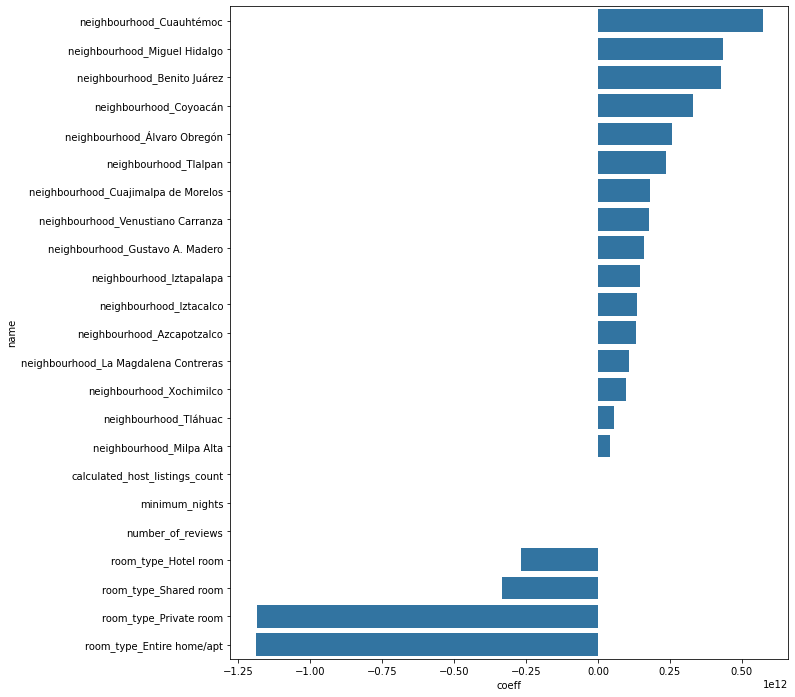

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

fi_df = fi_df.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(10,12))

sns.barplot(y= fi_df['name'], x = fi_df['coeff'])